In [1]:
# 07-3 exsoil

In [1]:
import warnings
warnings.filterwarnings("ignore")

# 加载数据

In [ ]:
import pandas as pd
df=pd.read_csv('data/exsoil.csv',header=None,encoding='gbk')
df.head() # 前5行数据
df.tail() # 后5行数据
df.shape # 行列数
df.info()  # 整体信息
df.groupby(5).size() # 已知分为3类

In [5]:
import pandas as pd
df=pd.read_csv('data/exsoil.csv',header=None,encoding='gbk')
df.head()

,0,1,2,3,4,5
0,47.2,32.3,57.4,28.1,29.3,3
1,51.7,27.8,59.2,22.7,36.5,3
2,38.6,43.2,43.1,23.9,19.2,2
3,35.3,46.9,40.8,22.2,18.6,2
4,48.8,27.3,54.8,28.1,26.7,3


In [6]:
df.tail()

,0,1,2,3,4,5
30,28.7,55.1,31.9,17.4,14.5,1
31,35.3,46.9,40.8,22.2,18.6,2
32,33.6,56.3,37.8,21.6,16.2,1
33,34.5,53.5,41.8,25.5,16.3,1
34,39.8,46.3,47.2,23.4,23.8,2


In [7]:
df.shape

(35, 6)

In [8]:
df.info()  # 数据整体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       35 non-null     float64
 1   1       35 non-null     float64
 2   2       35 non-null     float64
 3   3       35 non-null     float64
 4   4       35 non-null     float64
 5   5       35 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.8 KB


In [9]:
df.describe()   # 描述性统计

,0,1,2,3,4,5
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,41.414286,42.280000,45.525714,22.654286,23.282857,2.114286
std,8.046232,10.361632,7.864714,3.155979,6.510331,0.832128
min,28.700000,27.300000,31.700000,17.100000,14.500000,1.000000
25%,34.500000,32.750000,40.800000,20.750000,16.300000,1.000000
50%,39.800000,44.300000,45.500000,22.700000,23.800000,2.000000
75%,48.800000,49.700000,51.150000,24.000000,28.800000,3.000000
max,53.200000,63.500000,59.200000,29.700000,36.500000,3.000000


In [11]:
# 数据的分类分布，已知分为3类
df.groupby(5).size()

5
1    10
2    11
3    14
dtype: int64

#  数据预处理

In [12]:
from sklearn.model_selection import train_test_split
# 数据预处理
array = df.values
X = array[:, 0:-1].astype(float)
Y = array[:, -1]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
# 数据标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

# 特征分析

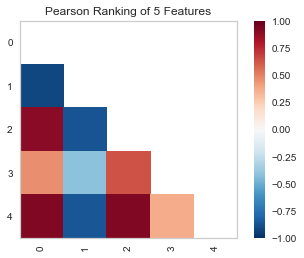

In [14]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='pearson')  # 皮尔森相关系数
visualizer.fit(X, Y)           
visualizer.transform(X)        
visualizer.poof()       

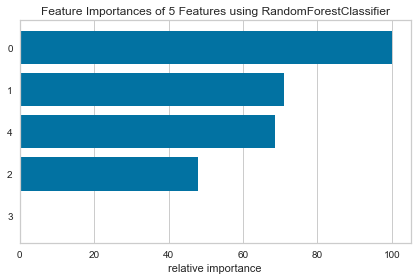

In [15]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features.importances import FeatureImportances
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, Y)
viz.poof()

# 肘部法

In [16]:
# 标准化数据
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

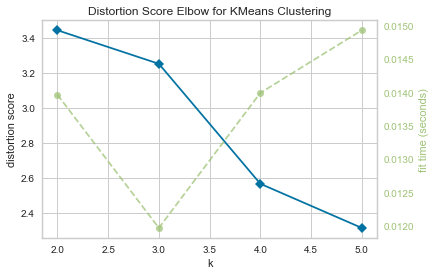

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
viz = KElbowVisualizer(model, k=(2,6))
viz.fit(X_train)
viz.poof()

# 分类轮廓

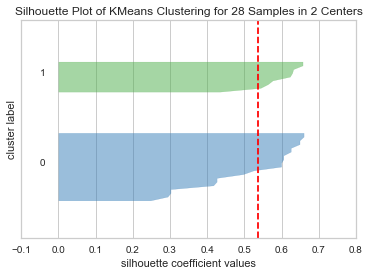

In [42]:
# 分类轮廓
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)
visualizer.poof()

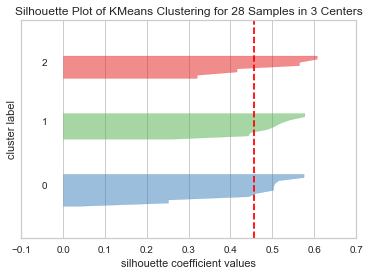

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)
visualizer.poof()

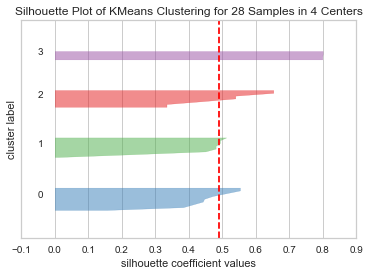

In [43]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_train)
visualizer.poof()

# 簇间距离

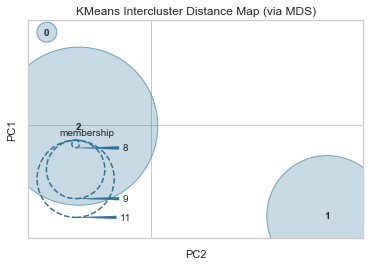

In [44]:
# 簇间距离
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance
model = KMeans(3)
visualizer = InterclusterDistance(model)
visualizer.fit(X_train)
visualizer.poof()

# 模型评估

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
model = KMeans(3)
model.fit(X_train)
predicted_labels=model.predict(X_train)
labels_true=Y_train
print("ARI：%s"%adjusted_rand_score(labels_true,predicted_labels))

ARI：0.8891170431211499


# 模型持久化

## 模型保存

In [45]:
from sklearn.externals import joblib
model_file = 'data/exsoil.m'
model = KMeans(3)
model.fit(X=X_train)
joblib.dump(model, model_file) 

E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


['data/exsoil.m']

## 模型加载

In [53]:
model2 = joblib.load(model_file) 
predicted_labels=model.predict(X_validation)
labels_true=Y_validation
print("ARI：%s"%adjusted_rand_score(labels_true,predicted_labels))

ARI：1.0
